In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json
import time
import unidecode as ud

# Opening and loading the data!

In [2]:
%%time

data = []
with open('table2007.json') as f:
    for line in f:
        data.append(json.loads(line))

CPU times: user 4.15 s, sys: 430 ms, total: 4.58 s
Wall time: 4.59 s


In [3]:
%%time

data = []
with open('table2007.json') as f:
    data = [json.loads(line) for line in f]


CPU times: user 4.29 s, sys: 465 ms, total: 4.75 s
Wall time: 4.76 s


So list comprehension didn't save me any time :-(.  And we took about 4 seconds to load 83MB.  This is mostly in case 

# What do the data look like?

Like the caption says

In [46]:
# curious about how much data we have:

len(data)

234586

Ok, hopefully that's enough to work with.  And what do these entries look like?

In [4]:
data[1:3]

[{u'author': u'[deleted]',
  u'body': u'Several more fallacies. Keep piling them on.',
  u'downs': u'0',
  u'gilded': u'0',
  u'link_id': u't3_63klz',
  u'name': u't1_c02q0jo',
  u'score_hidden': False,
  u'ups': u'2'},
 {u'author': u'[deleted]',
  u'body': u'The silence is deafening.',
  u'downs': u'0',
  u'gilded': u'0',
  u'link_id': u't3_63klz',
  u'name': u't1_c02q0jr',
  u'score_hidden': False,
  u'ups': u'3'}]

In [5]:
# turn "data" into a dataframe"
data_pd = pd.DataFrame(data)

# display what the data looks like
data_pd.head()

,author,body,downs,gilded,link_id,name,score_hidden,ups
0,quiller,"Assuming that isn't a rhetorical question, I b...",0,0,t3_63k3x,t1_c02q0jn,False,1
1,[deleted],Several more fallacies. Keep piling them on.,0,0,t3_63klz,t1_c02q0jo,False,2
2,[deleted],The silence is deafening.,0,0,t3_63klz,t1_c02q0jr,False,3
3,malcontent,You must be one of those guys who is a literal...,0,0,t3_63j16,t1_c02q0jw,False,1
4,Greengages,"""Don't worry America it's a simple operation. ...",0,0,t3_63kxs,t1_c02q0jy,False,2


## What kind of data types are we working with?

First things first, we need to check the data types.  I know this because I didn't check the data types and got some screwy results

In [6]:
data_pd.dtypes

author          object
body            object
downs           object
gilded          object
link_id         object
name            object
score_hidden      bool
ups             object
dtype: object

Lots of data there that is of the "wrong" type.  We'll fix that now.

In [7]:
# convert the numeric "objects" into floats.
data_pd[['ups', 'downs','gilded']] = data_pd[['ups', 'downs','gilded']].astype(float)

# reassess our data
data_pd.dtypes 

author           object
body             object
downs           float64
gilded          float64
link_id          object
name             object
score_hidden       bool
ups             float64
dtype: object

# Digging into the data

Much better.  Now, what do our ups and downs look like?

In [8]:
data_pd.downs, data_pd.ups

(0         0
 1         0
 2         0
 3         0
 4         0
 5         0
 6         0
 7         0
 8         0
 9         0
 10        0
 11        0
 12        0
 13        0
 14        0
 15        0
 16        0
 17        0
 18        0
 19        0
 20        0
 21        0
 22        0
 23        0
 24        0
 25        0
 26        0
 27        0
 28        0
 29        0
          ..
 234556    0
 234557    0
 234558    0
 234559    0
 234560    0
 234561    0
 234562    0
 234563    0
 234564    0
 234565    0
 234566    0
 234567    0
 234568    0
 234569    0
 234570    0
 234571    0
 234572    0
 234573    0
 234574    0
 234575    0
 234576    0
 234577    0
 234578    0
 234579    0
 234580    0
 234581    0
 234582    0
 234583    0
 234584    0
 234585    0
 Name: downs, dtype: float64, 0          1
 1          2
 2          3
 3          1
 4          2
 5          6
 6          2
 7          1
 8          5
 9          0
 10         0
 11       -10
 12       

Curiously, the ups aren't strictly positive numbers.  What exactly do the distributions of ups and downs look like?

In [9]:
data_pd.downs.min(),data_pd.downs.max()

(0.0, 0.0)

It appears that the downs aren't giving us any meaningful data.  Let's take a deeper look at our quantitative data.


In [10]:
data_pd.describe()

,downs,gilded,score_hidden,ups
count,234586,234586,234586,234586.000000
mean,0,0,0,2.842616
std,0,0,0,7.413193
min,0,0,False,-608.000000
25%,0,0,0,1.000000
50%,0,0,0,1.000000
75%,0,0,0,3.000000
max,0,0,False,559.000000


We may have a terrible data set.  The downs and gilded values are meaningless and the score_hidden value doesn't mean anything to me.  The ups series appears to be the compilation of both ups and downs instead of just a count of ups.

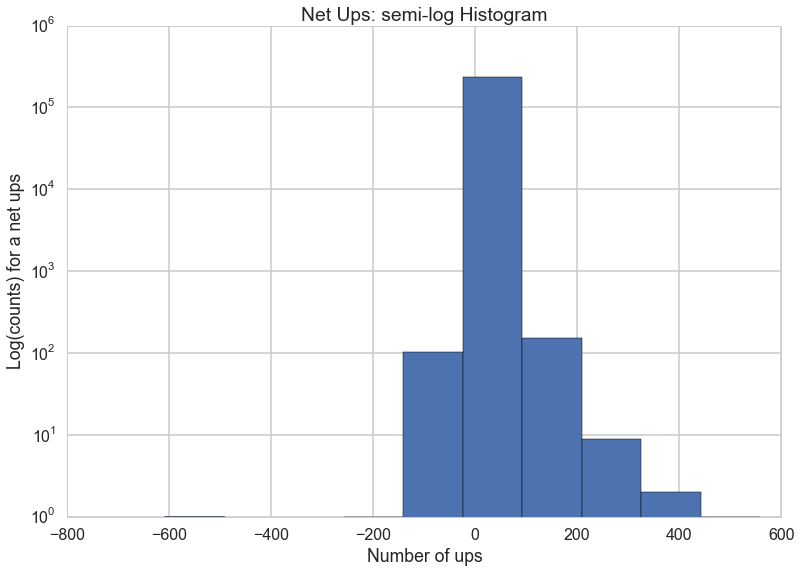

In [11]:
data_pd.ups.plot(x = "ups",y = "log(counts)", kind = 'hist',logy = True)
plt.xlabel("Number of ups")
plt.ylabel("Log(counts) for a net ups")

plt.title("Net Ups: semi-log Histogram")

Looks like the Net Ups have very very small tails, with the right tail being much heavier than the left.

The semi-log histogram suggested the data was pretty close to 1, but how close?

In [47]:

d = 0
for i in [-3,-2,-1,0,1,2,3,4,5,6,7,8,9]:
    t = sum(df.score == i)
    d = d + t
    print t
print "within domain counts: ",d
print "within domain probability: ",d/234586.

2306
4488
8719
21281
86013
35064
19450
9269
8186
6228
4498
3393
2674
within domain counts:  211569
within domain probability:  0.901882465279


So the spread of the data is very tight.  Anything above 9 or below -3 is in the upper or low 5% respectively.

## Creating new data columns

Before scrapping this data set, I'm going to see about picking apart the comments (and debugging) on this smaller dataset before stressing my computer on a larger dataset.  Namely, I want to know how long the different comments are.  How many words, how many sentences?

In [12]:
# sampling the split on the text in 10 different comments
test = data_pd.body[1:10].apply(lambda x: x.split())
print test

# counting the words in 10 different comments
test.apply(lambda x: len(x))

1    [Several, more, fallacies., Keep, piling, them...
2                       [The, silence, is, deafening.]
3    [You, must, be, one, of, those, guys, who, is,...
4    ["Don't, worry, America, it's, a, simple, oper...
5                                          [[deleted]]
6    [Yes,, let's, turn, the, economy, over, to, a,...
7    [Well, Afghanistan, is, 6000, miles, away., Be...
8                                          [[deleted]]
9    [I, never, imagined, I, would, want, the, stat...
Name: body, dtype: object


1     7
2     4
3    56
4    29
5     1
6    15
7    31
8     1
9    11
Name: body, dtype: int64

Using the schema from above in the subsequent cell, we create a new column called "words" which counts the number of words in the body of a comment.

In [13]:
%%time

# split will take the text from the body and break it apart on the space character yielding a bunch of "words."
# These aren't necessarily all words, but it's a pretty good approximation.

# After the split is stored in a list, we count the number of elements in the list
# and return that as the ESTIMATED number of words in the review.

data_pd['words'] = data_pd.body.apply(lambda x: len(x.split()))

CPU times: user 1.13 s, sys: 26.3 ms, total: 1.16 s
Wall time: 1.14 s


In [14]:
data_pd.head()

,author,body,downs,gilded,link_id,name,score_hidden,ups,words
0,quiller,"Assuming that isn't a rhetorical question, I b...",0,0,t3_63k3x,t1_c02q0jn,False,1,47
1,[deleted],Several more fallacies. Keep piling them on.,0,0,t3_63klz,t1_c02q0jo,False,2,7
2,[deleted],The silence is deafening.,0,0,t3_63klz,t1_c02q0jr,False,3,4
3,malcontent,You must be one of those guys who is a literal...,0,0,t3_63j16,t1_c02q0jw,False,1,56
4,Greengages,"""Don't worry America it's a simple operation. ...",0,0,t3_63kxs,t1_c02q0jy,False,2,29


Run time is surprisingly fast on the word count function.  Next we try and count the number of sentences in each comment.  This will be a bit trickier as we have to pay some attention to context.  Is a period at the end of a sentence, abbreviation, acronym, or some combination of the above?  The function terminal_punc_est() is so named because it is an estimate intended to get close to the actual number of sentences.

In [15]:
# checks if a word is an abbreviation or ellipsis.  Can be added to.
def abbrev(word):
    return (word in ['Mr.','mr.','Mrs.','mrs.','...'])
    
# checks if a word has multiple dots, high likelihood of being an acronym
def acronym(word):
    letters = [word.split()]
    dots = 0
    for letter in letters:
        if letter == '.':
            dots = dots + 1
    return dots > 1

# rough estimate of the number of sentences. It's not perfect,
# but it does some error checking for acronyms and abbreviations
def terminal_punc_est(text):
    word_list = text.split()
    terminal_periods = 0
    for entry in word_list:
        if entry[-1] in ['!','?']:
            terminal_periods = terminal_periods + 1
        elif entry[-1] == '.':
            if not abbrev(entry) and not acronym(entry):
                terminal_periods = terminal_periods + 1
            elif entry[-2] =='.':
                terminal_periods = terminal_periods + 1
        elif entry[-2:] == '."':
            terminal_periods = terminal_periods + 1
    return terminal_periods


In [16]:
%%time
data_pd['sentences'] = data_pd.body.apply(terminal_punc_est)

CPU times: user 8.76 s, sys: 214 ms, total: 8.97 s
Wall time: 8.86 s


Given how many embedded functions have to run and how many more cases need to be managed, I'm surprised this runs as fast as it does.

In [17]:
data_pd.head()

,author,body,downs,gilded,link_id,name,score_hidden,ups,words,sentences
0,quiller,"Assuming that isn't a rhetorical question, I b...",0,0,t3_63k3x,t1_c02q0jn,False,1,47,2
1,[deleted],Several more fallacies. Keep piling them on.,0,0,t3_63klz,t1_c02q0jo,False,2,7,2
2,[deleted],The silence is deafening.,0,0,t3_63klz,t1_c02q0jr,False,3,4,1
3,malcontent,You must be one of those guys who is a literal...,0,0,t3_63j16,t1_c02q0jw,False,1,56,4
4,Greengages,"""Don't worry America it's a simple operation. ...",0,0,t3_63kxs,t1_c02q0jy,False,2,29,3


At this point, I wanted better data, but looking at more recent years and other parts of the data set, it looks like the downs, gilded, and score_hidden, and controversial stats are all 0 or null.  I think we're going to have to work with what we've got.

The good news: if I need more data, I can at least go back and grab more data.  Just won't have much luck grabbing labeled data (I really wanted the controversial label, as well as the up/down breakdown).

So, let's get rid of the useless columns:

In [65]:
df = data_pd[['author','body','link_id','name','ups','words','sentences']]
df.columns = [u'author', u'body', u'link_id', u'name', u'score', u'words', u'sentences']
df

,author,body,link_id,name,score,words,sentences
0,quiller,"Assuming that isn't a rhetorical question, I b...",t3_63k3x,t1_c02q0jn,1,47,2
1,[deleted],Several more fallacies. Keep piling them on.,t3_63klz,t1_c02q0jo,2,7,2
2,[deleted],The silence is deafening.,t3_63klz,t1_c02q0jr,3,4,1
3,malcontent,You must be one of those guys who is a literal...,t3_63j16,t1_c02q0jw,1,56,4
4,Greengages,"""Don't worry America it's a simple operation. ...",t3_63kxs,t1_c02q0jy,2,29,3
5,[deleted],[deleted],t3_63kos,t1_c02q0k1,6,1,0
6,[deleted],"Yes, let's turn the economy over to a crank ba...",t3_63klz,t1_c02q0k4,2,15,2
7,Bloodlustt,Well Afghanistan is 6000 miles away. Being in...,t3_63khq,t1_c02q0k7,1,31,2
8,[deleted],[deleted],t3_63lcr,t1_c02q0k8,5,1,0
9,billbacon,I never imagined I would want the states to tu...,t3_63kxx,t1_c02q0ka,0,11,1


What is that odd character in the last 2 rows?

In [20]:
df.body[234584]

u'&gt;I\'m not sure what RP said is "racism".\n\nWell, we\'re making progress here. At least you admit he wrote those words. But that also means you are calling the great man a liar as he denies writing them. '

In [21]:
df.body[234585]

u'&gt;Among those who aspire to the White House, only Paul has informed his closest supporters that "our country is being destroyed by a group of actual and potential terrorists -- and they can be identified by the color of their skin."'

Looks like it's the quoted text character.

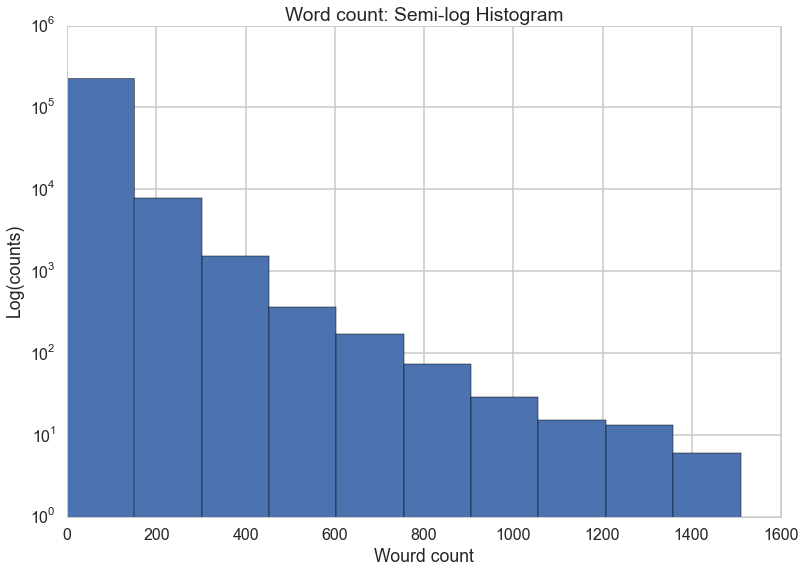

In [23]:
df.words.plot(kind = 'hist',logy = True)
sum(df.words>50)


plt.title("Word count: Semi-log Histogram")
plt.xlabel("Wourd count")
plt.ylabel("Log(counts)")

So the vast majority of comments are short, but still some longer stuff to take a look at. Before I forget, I want to create a variable indicating if a comment is positive or negative (for future logistic regression):

In [66]:
df['positive'] = 1 * (df.score > 0)

/Users/coursera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
# this function counts the number of reply symbols that show up in the comment text
# it isn't an exact of how many pieces of quoted text are replied to, but it's a reasonable
# approximation. (some comments have a termal quote_block symbol)

def reply_count(text):

    # initialize the count
    count = 0
    
    # split text into words
    list_of_words = text.split()

    # for each word, if it begins with 
    for word in list_of_words:
        # apparently if you ask for more letters than the word has, there is no error and you get the entire word.
        if word[:4] == '&gt;':
            count = count + 1
    
    return count

In [68]:
%%time

df['reply_count'] = df.body.map(reply_count)

CPU times: user 3.02 s, sys: 170 ms, total: 3.19 s
Wall time: 3.06 s


/Users/coursera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


That was fast.  If someone knows how to use .loc to make the pink thing go away, please tell me.  I've used the .loc command, but manner in which I use it just throws a different warning.

Anyway, what does the number of replies look like?

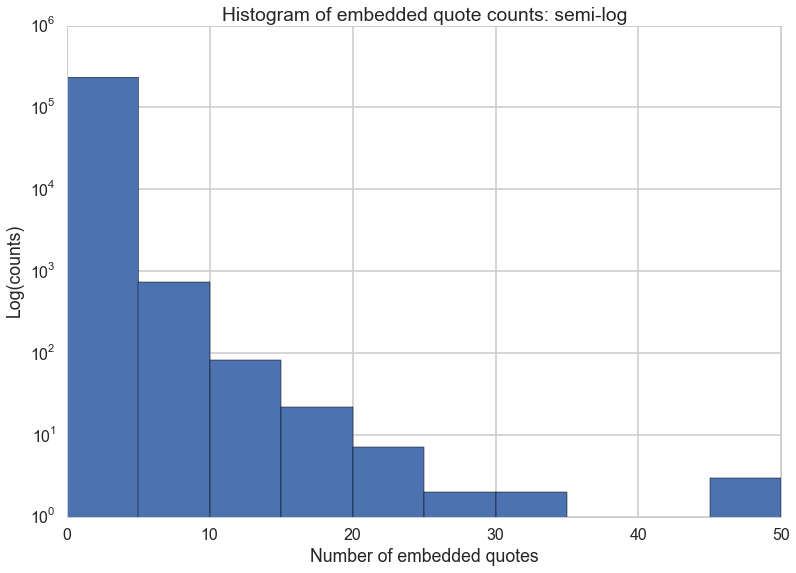

In [69]:
df.reply_count.plot(kind = "hist",logy = True)
plt.title("Histogram of embedded quote counts: semi-log")
plt.ylabel("Log(counts)")
plt.xlabel("Number of embedded quotes")

In [70]:
for i in range(0,20):
    print i, sum(df.reply_count == i)

0 214845
1 14320
2 2772
3 1197
4 600
5 337
6 178
7 127
8 48
9 43
10 29
11 18
12 17
13 9
14 10
15 4
16 8
17 2
18 5
19 3


We can see that the vast majority of comments have a small number, if any, of embedded quotes within their text.  This presents a problem a hadn't foreseen where text is being recycled from comment to comment and we are distilling the uniqueness of any given comment.

How to filter out the text of the embedded quotes?  We'll start by looking at what comments with embedded quotes look like.

In [71]:
test = df.body[df.reply_count == 3]
test.head()

371    &gt;I also think we must remember the 60's , o...
379    &gt; hyperinflation does not make things "chea...
554    &gt;where no criminal laws apply to the contra...
644    &gt;After inflation I could use my euros to bu...
745    &gt;Yes, that's what i'm talking about.\n\nI c...
Name: body, dtype: object

In [72]:
test = test.reset_index()

In [73]:
test.body[1]

u'&gt; hyperinflation does not make things "cheaper". essentially the dollars that foreigners held would be worth exponentially less.\n\nI don\'t hold any dollars. After inflation I could use my euros to buy your dirt cheap stuff from US as could any other entity that doesn\'t have their money in dollars (like you do).\n\n&gt; so that home that used to cost $1mm is now on the market for $50mm USD.\n\nexactly. And money in your bank account is still $5000. And because of the market, people cannot afford to pay that $50m for the property so the prices at the market go down.  Really down.\n\nBy the way my money is multiplied compared to dollars so I can afford that property after the crash.\n\nRead about argentina and verify yourself what houses used to cost in real value before and after hyperinflation in for example Buenos Aires.\n\n&gt; fail. the only people who could be protected by such a ridiculous move would be US citizens themselves due to tax subsidies (instead of liabilities). y

In [74]:
test.body[2]

u"&gt;where no criminal laws apply to the contractors because they have been granted immunity in the jurisdiction where the crime took place.\r\n\r\nThat's not possible, and any such immunity is what really she should be challenging.  Come on, did you seriously not go to law school?  Why are you making shit up?\r\n\r\n&gt;You are completely, 100% wrong.\r\n\r\nI am not wrong, Do you have access to lexisnexis at your computer?  Or westlaw?  I'll give you some cases to read if you want.\r\n\r\nIf she wan't to be taken seriously, she needs some sort of evidentiary document to provide the court that the crime was comitted in a certain jurisdiction - then the immunity clause can be looked into.\r\n\r\n&gt;You are absolutely, 100%, dead wrong. Wrong, wrong, wrong.\r\n\r\nWow, great debating there, no citation or anyting - just say wrong 4 times and i'm wrong, is that what they taught you in law school?\r\n\r\nYou're getting very emotional about all this, violent and angry with your words - i

In [75]:
test.body[3]

u'&gt;After inflation I could use my euros to buy your dirt cheap stuff from US as could any other entity that doesn\'t have their money in dollars (like you do).\r\n\r\nonce again, inflation does not make anything "cheaper".  comprehension of this simple concept is critical to understanding international economics.\r\n\r\n&gt;exactly. And money in your bank account is still $5000.\r\n\r\nfail.  you chose to conveniently ignore the section on US citizens being protected.\r\n\r\n&gt;So for some miraculous way peoples and companies bank account saldos will multiply?\r\n\r\nyes.  the government could immediately issue tax subsidies to United States citizens that would effectively transfer wealth from debt holders (e.g., china) to US citizens.'

In [76]:
test.body[4]

u"&gt;Yes, that's what i'm talking about.\n\nI can't see why. TFA doesn't speak about it, I don't speak about it. If you want to speak about the smell of the roses, find somebody interested. That ain't me.\n\n&gt;&gt;not that anyone can be brainwashed\n\n&gt;Yet, that's what happens when someone is broken\n\nOk, here you're a little bit *on* subject, but it's [irrelevant.](http://en.wikipedia.org/wiki/Brainwashing) Relevant concept is [submission](http://www.google.be/search?q=define%3A+submission)."

In [77]:
test.body[5]

u'LittleGreenFootballs?  Although the website seems to be down right now.\n\nhttp://en.wikipedia.org/wiki/Little_Green_Footballs\n\nFrom the Wikipedia article:\n\n&gt;For "promoting Israel, and Zionism" and "presenting Israel\'s side of the conflict," LGF won the "Best Israel Advocacy Blog" award from the Jerusalem Post in 2005 [5]. According to Gil Ronen, a reporter for Internet news outlet, Israel National News:[6]\n&gt;\n&gt;If anyone ever compiles a list of Internet sites that contribute to Israel\u2019s public relations effort, Johnson\'s site will probably come in first, far above the Israeli Foreign Ministry\'s site. '

In [78]:
test.body[6]

u"&gt;They are a decade away from a bomb, minimum,\r\n\r\nThe iaea doesn't know that, how do you?  \r\n\r\n&gt;. What would they do with it that would not result in immediate retaliation? \r\n\r\nYou're assuming that no one in the IRGC or government believes in bringing about the coming of the mahdi (12th imam) through a sea of cleansing fire only after the temple mount is utterley wiped from the earth in a great cataclsym of fire.\r\n\r\n&gt;Shoot one at Israel? Israel has several hundred they can shoot back.\r\n\r\nReally?  well that certainly would bring about the end times that certain islamic and christian evangelical nutballs would love to see.\r\n\r\nUh oh."

In [79]:
test.body[7]

u'Whoops....\n\n&gt;Environmental Media Services http://www.ems.org/rls/2003/12/22/religion_on_disp.html\n\n&gt;*Washington, DC -- In a series of recent decisions, the National Park Service has approved the display of religious symbols and Bible verses, as well as the sale of creationist books giving a non-evolutionary explanation for the Grand Canyon and other natural wonders within national parks, according to documents released today by Public Employees for Environmental Responsibility (PEER). Also, under pressure from conservative groups, the Park Service has agreed to edit the videotape that has been shown at the Lincoln Memorial since 1995 to remove any image of gay and abortion rights demonstrations that occurred at the memorial.\n\n&gt;**"The Park Service leadership now caters exclusively to conservative Christian fundamentalist groups," stated PEER Executive Director Jeff Ruch. "The Bush Administration appears to be sponsoring a program of Faith-Based Parks."**'

In [80]:
test.body[8]

u"http://www.iaea.org/Publications/Documents/Board/2007/gov2007-58.pdf\r\n\r\n&gt;so that would be necessary for a power plant.\r\n\r\nYeah, although unfortunatley for you the IAEA doesn't think so, as it's part of their special questions list.\r\n\r\n&gt;but I have to say this is the first I've heard of it.\r\n\r\nParagraph 28.  Perhaps you should read the literature before forming opinions about what is going on in the world eh?\r\n\r\n&gt;When did they stop letting inspectors in? I know they did not allow full inspections 20 months ago, but it was my understanding that they had been more cooperative since.\r\n\r\nWhy would you have that understanding?  The IAEA report makes it very clear that Iran has not been cooperative.\r\n\r\nOh, wait i know why, because you saw on CNN that the iaea report said they were cooperating.  Ahh.  See the problem there is you are believing the MSM is giving you all the facts.\r\n\r\nThe iaea said Iran is cooperating in giving info about the SECRET nuke

### Analysis of text

The pattern in most of the cases is that the quoted text goes from the special character '&gt;' to the first \n\n or \r\n.  Then new text flows from then until the next quoted text character (&gt;).  So, as a rough approximation, I should cut out anything between a quoted text character and the subsequent \n\n or \r\n characters.  I think it might be easier to just run from the special character to the \n character and chop that off.  Looking at the above, there is one case where this algorithm appears to falter, but this looks like it gives the right result 90%+ of the time.

I can revisit this if I come up with a better method, although I think a better method at this point will involve actually reading all the comments, which is certainly better, but not time efficient.

In [81]:
# need to read characters into a new character list until "&gt;" shows up,
# then not read until a \n or \r, then start reading again

def strip_replies(text):
    # initialize the return text
    clean_text = ""
    
    # variable assignment of the odd characters to prevent retyping
    quote_block = "&gt;"
    
    # noting the length of the text so I don't overshoot the array
    # of characters and create an error from an invalid read
    text_length = len(text)
    
    # initializing where in the text string we are
    i = 0
    
    # this loop will run from the beginning to end of a piece of text stripping out text
    # that appears after the 
    while i in range(0,text_length):

        # if we identify embedded quotes, skip that character and start cutting text
        if text[i:i+4] == quote_block:
            i = i + 4
            next_char = " "
            
            # if we have stumbled upon a quote block, this will effectively cut out all of
            # the text between the quote block and the next \n or \r character, which is
            # a reasonable approximation of the quotes
            while next_char not in ['\n','\r']:
                if i == text_length:
                    break
                next_char = text[i]
                i = i + 1

        # if we're not in embedded text, keep it for final output
        else:
            clean_text = clean_text + text[i]
            i = i + 1
            
    # return the comment sans embedded text
    return clean_text
            

In [82]:
test_sample = test.body[4]
strip_replies(test_sample)

u"\nI can't see why. TFA doesn't speak about it, I don't speak about it. If you want to speak about the smell of the roses, find somebody interested. That ain't me.\n\n\n\nOk, here you're a little bit *on* subject, but it's [irrelevant.](http://en.wikipedia.org/wiki/Brainwashing) Relevant concept is [submission](http://www.google.be/search?q=define%3A+submission)."

In [83]:
test_sample

u"&gt;Yes, that's what i'm talking about.\n\nI can't see why. TFA doesn't speak about it, I don't speak about it. If you want to speak about the smell of the roses, find somebody interested. That ain't me.\n\n&gt;&gt;not that anyone can be brainwashed\n\n&gt;Yet, that's what happens when someone is broken\n\nOk, here you're a little bit *on* subject, but it's [irrelevant.](http://en.wikipedia.org/wiki/Brainwashing) Relevant concept is [submission](http://www.google.be/search?q=define%3A+submission)."

It appears that we have a function that reliably strips out our quoted blocks.  How quickly does this run?

In [84]:
%%time


start = time.time()
# body_short = df.body.map(strip_replies)

# demonstrates that progress is slow but steady. ... just slow.
for i in range(234585):
    strip_replies(df.body[i])
    if i%1000 == 0:
        now = time.time()
        print i, now - start
        start = now
    if i == 20000:
        break

        

0 0.00627517700195
1000 3.8520488739
2000 2.87574911118
3000 3.38337397575
4000 3.74539208412
5000 2.38130092621
6000 4.04095888138
7000 5.00921010971
8000 2.94628286362
9000 3.36769199371
10000 3.71394300461
11000 4.35204315186
12000 5.5678858757
13000 5.83696913719
14000 3.55226588249
15000 4.46844100952
16000 4.02599716187
17000 2.47376799583
18000 3.45582985878
19000 3.14278507233
20000 3.77083992958
CPU times: user 1min 15s, sys: 1 s, total: 1min 16s
Wall time: 1min 15s


This is working, but taking too long.  Since there are only about 40k replies with embedded text (out of the full 235K), we need to work on just those values and isert them into the original dataframe.

In [85]:
%%time

to_parse = df.body[df.reply_count > 0]

CPU times: user 9.86 ms, sys: 764 µs, total: 10.6 ms
Wall time: 9.59 ms


In [86]:
%%time
parsed = to_parse.map(strip_replies)

CPU times: user 4min 20s, sys: 2.83 s, total: 4min 23s
Wall time: 4min 21s


Now we can put the parsed data back into the dataframe.  We'll create a new dataframe in case we have to back-pedal

In [87]:
# create a fresh copy of our data frame for the new cleaned up comments

# without the parentheses, you get nonsense :-(
df_clean = df.copy(deep=True)

In [90]:
print to_parse[40],'end'
print parsed[40],'end'

&gt;a lot of Paul supporters are eccentric bordering on bonkers.

That would be my guess. end

That would be my guess. end


In [91]:
print parsed[40]
print df.body[40]
print df_clean.body[40]
df_clean.body[40] = parsed[40]

print df.body[40]
print df_clean.body[40]


That would be my guess.
&gt;a lot of Paul supporters are eccentric bordering on bonkers.

That would be my guess.
&gt;a lot of Paul supporters are eccentric bordering on bonkers.

That would be my guess.
&gt;a lot of Paul supporters are eccentric bordering on bonkers.

That would be my guess.

That would be my guess.


/Users/coursera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
%%time

for i in parsed.index:
    df_clean.body[i] = parsed[i]
    print i

40
54
56
67
80
99
124
185
200
203
219
231
235
257
272
276
339
352
371
379
392
400
401
424
427
434
441
460
461
466
475
481
485
496
502
508
513
524
536
538
554
558
563
569
581
637
644
686
693
729
731
732
745
758
760
761
769
777
795
812
821
836
847
849
859
864
873
882
886
899
902
909
953
960
981
984
986
993
999
1001
1003
1011
1028
1037
1062
1076
1082
1085
1107
1114
1130
1165
1168
1202
1209
1222
1225
1229
1234
1260
1264
1290
1299
1304
1305
1312
1316
1335
1340
1345
1356
1363
1371
1374
1415
1417
1497
1531
1540
1553
1559
1560
1595
1599
1609
1615
1618
1619
1621
1631
1637
1649
1652
1681
1691
1721
1768
1776
1791
1803
1829
1861
1879
1883
1900
1907
1908
1913
1939
1948
1954
1966
1970
2021
2082
2083
2102
2111
2114
2132
2144
2151
2153
2154
2164
2180
2192
2194
2201
2204
2235
2236
2249
2252
2256
2260
2269
2288
2296
2301
2306
2317
2360
2396
2418
2500
2515
2520
2522
2542
2549
2554
2567
2568
2575
2589
2594
2629
2630
2648
2653
2689
2732
2752
2797
2799
2811
2814
2830
2911
2913
2929
2932
2959
2964
2970
2974


/Users/coursera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
%%time

# re-running the word and sentence counts now that the embedded quotes have been pruned

df_clean['words'] = df_clean.body.apply(lambda x: len(x.split()))
df_clean['sentences'] = df_clean.body.apply(terminal_punc_est)

CPU times: user 8.13 s, sys: 347 ms, total: 8.48 s
Wall time: 8.22 s


In [94]:
df_clean.head()

,author,body,link_id,name,score,words,sentences,positive,reply_count
0,quiller,"Assuming that isn't a rhetorical question, I b...",t3_63k3x,t1_c02q0jn,1,47,2,1,0
1,[deleted],Several more fallacies. Keep piling them on.,t3_63klz,t1_c02q0jo,2,7,2,1,0
2,[deleted],The silence is deafening.,t3_63klz,t1_c02q0jr,3,4,1,1,0
3,malcontent,You must be one of those guys who is a literal...,t3_63j16,t1_c02q0jw,1,56,4,1,0
4,Greengages,"""Don't worry America it's a simple operation. ...",t3_63kxs,t1_c02q0jy,2,29,3,1,0


Still want a column indicating question marks, a column indicating exclamation marks, and a column indicating hyperlinks.

In [100]:
#multi-purpose function intended to count punctuation

def count_symbol(text,symbol):
    count = 0
    length = len(text)
    
    for i in range(length):
        if text[i] == symbol:
            count = count + 1
    return count

In [101]:
df_clean.body[1]

u'Several more fallacies. Keep piling them on.'

In [111]:
print (count_symbol(df_clean.body[1],'.'), 
       count_symbol(df_clean.body[1],'?'), 
       count_symbol(df_clean.body[1],'!'), 
       count_symbol(df_clean.body[1],'e'))

(2, 0, 0, 7)


Looks like the function is working.  Let's apply it to the entire series of comments.

In [108]:
%%time

df_clean['question'] = df_clean.body.map(lambda x:count_symbol(x,'?'))
df_clean['exclamation'] = df_clean.body.map(lambda x:count_symbol(x,'!'))

CPU times: user 18 s, sys: 1.01 s, total: 19 s
Wall time: 18.2 s


In [109]:
df_clean.head()

,author,body,link_id,name,score,words,sentences,positive,reply_count,question,exclamation
0,quiller,"Assuming that isn't a rhetorical question, I b...",t3_63k3x,t1_c02q0jn,1,47,2,1,0,0,0
1,[deleted],Several more fallacies. Keep piling them on.,t3_63klz,t1_c02q0jo,2,7,2,1,0,0,0
2,[deleted],The silence is deafening.,t3_63klz,t1_c02q0jr,3,4,1,1,0,0,0
3,malcontent,You must be one of those guys who is a literal...,t3_63j16,t1_c02q0jw,1,56,4,1,0,2,0
4,Greengages,"""Don't worry America it's a simple operation. ...",t3_63kxs,t1_c02q0jy,2,29,3,1,0,0,0


In [110]:
df.body[3]

u'You must be one of those guys who is a literalist. Like the people who take the bible literally.\n\nWhat do you think the role of the supreme court is?\n\nI suppose you would have no problems with states jailing people for taking a shit since that right is not in articulated in the constitution right?\n'

Terrific.  Questions and Exclamations counted.  Time to move on to hypelinks

In [112]:
def count_symbol_generic(text,symbol):
    count = 0
    length = len(text)
    s_length = len(symbol)
    for i in range(length):
        if text[i:i+s_length] == symbol:
            count = count + 1
    return count

In [140]:
count_symbol_generic(test_sample,'http')

2

In [141]:
test_sample

u"&gt;Yes, that's what i'm talking about.\n\nI can't see why. TFA doesn't speak about it, I don't speak about it. If you want to speak about the smell of the roses, find somebody interested. That ain't me.\n\n&gt;&gt;not that anyone can be brainwashed\n\n&gt;Yet, that's what happens when someone is broken\n\nOk, here you're a little bit *on* subject, but it's [irrelevant.](http://en.wikipedia.org/wiki/Brainwashing) Relevant concept is [submission](http://www.google.be/search?q=define%3A+submission)."

In [142]:
%%time

df_clean['hyperlinks'] = df_clean.body.map(lambda x:count_symbol_generic(x,'http'))

CPU times: user 12.6 s, sys: 275 ms, total: 12.9 s
Wall time: 12.7 s


In [143]:
test.describe()

count    234586.000000
mean          0.080354
std           0.424003
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: body, dtype: float64

In [144]:
df_clean.head()

,author,body,link_id,name,score,words,sentences,positive,reply_count,question,exclamation,hyperlinks
0,quiller,"Assuming that isn't a rhetorical question, I b...",t3_63k3x,t1_c02q0jn,1,47,2,1,0,0,0,0
1,[deleted],Several more fallacies. Keep piling them on.,t3_63klz,t1_c02q0jo,2,7,2,1,0,0,0,0
2,[deleted],The silence is deafening.,t3_63klz,t1_c02q0jr,3,4,1,1,0,0,0,0
3,malcontent,You must be one of those guys who is a literal...,t3_63j16,t1_c02q0jw,1,56,4,1,0,2,0,0
4,Greengages,"""Don't worry America it's a simple operation. ...",t3_63kxs,t1_c02q0jy,2,29,3,1,0,0,0,0


In [149]:
df_clean.to_pickle('df_clean.pkl')

# Can pick up here without re-running the entire notebook

In [75]:
# if you broke things again and need to restart the kernel, ... well, start here!

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json
import time
import unidecode as ud

# Make a dictionary!

Make all the letters small and assemble a dictionary!  In truth, this should have been done way back at the beginning, although, I'm not sure it really matters that much since I haven't used the actual words just yet.

So, this has gone through several iterations.  What I have now does a pretty good job of taking out hyperlinks and unrelated punctuation and characters.  Unicode is turned into ascii and processed.

There are a few special cases that are still showing up.  I don't take out hyphens because more often than not, they are meaningful.  That said, I need to take out leading hyphens, and leading and trailing apostrophes (internal apostrophes are usually contractions or otherwise meaningful to words.

In [244]:
# take the data

df_clean = pd.read_pickle('df_clean.pkl')
df_clean.head()

,author,body,link_id,name,score,words,sentences,positive,reply_count,question,exclamation,hyperlinks
0,quiller,"Assuming that isn't a rhetorical question, I b...",t3_63k3x,t1_c02q0jn,1,47,2,1,0,0,0,0
1,[deleted],Several more fallacies. Keep piling them on.,t3_63klz,t1_c02q0jo,2,7,2,1,0,0,0,0
2,[deleted],The silence is deafening.,t3_63klz,t1_c02q0jr,3,4,1,1,0,0,0,0
3,malcontent,You must be one of those guys who is a literal...,t3_63j16,t1_c02q0jw,1,56,4,1,0,2,0,0
4,Greengages,"""Don't worry America it's a simple operation. ...",t3_63kxs,t1_c02q0jy,2,29,3,1,0,0,0,0


In [245]:
%%time

# split the data

list_of_words = temp.map(lambda x: x.split())

CPU times: user 1.34 s, sys: 416 ms, total: 1.76 s
Wall time: 1.84 s


In [246]:
# this function checks for hyperlinks and, if found, replaces the entire 'word' with ''.

def strip_word(text,identifier):
    
    # variable assignment of the letters prevent retyping
    block = identifier
    block_length = len(block)
    # noting the length of the text so I don't overshoot the array
    # of characters and create an error from an invalid read
    text_length = len(text)

    i = 0
    while i in range(0,text_length-block_length):

        # if we identify a hyperlink:
        if text[i:i+block_length] == block:
            
            #return nothing
            return ""
        i = i + 1
        
    return text

# this function can be used in conjunction with the above to strip out the hyperlink words.

def shorten_list(list):
    
    words = []

    for i in list:
        if i != '':
            words.append(i)
            
    return words

In [247]:
%%time

temp_words = [shorten_list([strip_word(i,'http') for i in j]) for j in list_of_words]
temp_words = [shorten_list([strip_word(i,'www') for i in j]) for j in temp_words]
temp_words = [shorten_list([strip_word(i,'.com') for i in j]) for j in temp_words]
temp_words = [shorten_list([strip_word(i,'.gov') for i in j]) for j in temp_words]
temp_words = [shorten_list([strip_word(i,'.html') for i in j]) for j in temp_words]
temp_words = [shorten_list([strip_word(i,'.htm') for i in j]) for j in temp_words]

CPU times: user 2min 51s, sys: 1.98 s, total: 2min 53s
Wall time: 2min 54s


In [248]:
stasis = temp_words

In [249]:
temp_words[28]

['shut', 'the', 'hell', 'up', 'k']

If that worked, now we'll rejoin things, edit out the unicode, make substitutions, and resplit.

In [250]:
def join_up(list_of_words):
    text = ""
    for word in list_of_words:
        text = text + " " + word
    return text

In [251]:
join_up(temp_words[28])

' shut the hell up k'

In [252]:
%%time

temp_list = [join_up(i).lower() for i in temp_words] 

CPU times: user 3.55 s, sys: 45 ms, total: 3.6 s
Wall time: 3.59 s


In [253]:
df_clean.body = temp_list

In [254]:
%%time

df_clean.body = df_clean.body.map(lambda x: x.lower())
temp = df_clean.body.map(lambda x: ud.unidecode(x))

CPU times: user 28.5 s, sys: 278 ms, total: 28.8 s
Wall time: 29.2 s


/Users/coursera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  app.launch_new_instance()


In [255]:
%%time

temp = temp.map(lambda x: x.replace('?',' '))
temp = temp.map(lambda x: x.replace(',',' '))
temp = temp.map(lambda x: x.replace('.',' '))
temp = temp.map(lambda x: x.replace(':',' '))
temp = temp.map(lambda x: x.replace(';',' '))
temp = temp.map(lambda x: x.replace('!',' '))

# taking out hyphens actually broke some stuff.
#temp = temp.map(lambda x: x.replace('-',''))
temp = temp.map(lambda x: x.replace('"',' '))
temp = temp.map(lambda x: x.replace('(',' '))
temp = temp.map(lambda x: x.replace(')',' '))
temp = temp.map(lambda x: x.replace('[',' '))
temp = temp.map(lambda x: x.replace(']',' '))

temp = temp.map(lambda x: x.replace('--',' '))
temp = temp.map(lambda x: x.replace('/',' '))
temp = temp.map(lambda x: x.replace('=',' '))
temp = temp.map(lambda x: x.replace('*',' '))
temp = temp.map(lambda x: x.replace('_',' '))

temp = temp.map(lambda x: x.replace('^',' '))
temp = temp.map(lambda x: x.replace('~',' '))
temp = temp.map(lambda x: x.replace('|',' '))
temp = temp.map(lambda x: x.replace('{',' '))
temp = temp.map(lambda x: x.replace('}',' '))
temp = temp.map(lambda x: x.replace('`',' '))
temp = temp.map(lambda x: x.replace('\\',' '))

temp = temp.map(lambda x: x.replace('&amp','@'))
temp = temp.map(lambda x: x.replace('&lt',' '))
temp = temp.map(lambda x: x.replace('&gt',' '))

CPU times: user 4.62 s, sys: 73.4 ms, total: 4.69 s
Wall time: 4.75 s


In [256]:
list_of_list_of_words = temp.map(lambda x: x.split())

In [257]:
%%time

nlolow = []

index = 0
for list_of_words in list_of_list_of_words:
    low = []
    for word in list_of_words:
        sub = word
        if len(sub)!=1:
            if sub[-1] in ["'","-"]:
                sub = sub[0:-1]
            if sub[0] in ['-',"'"]:
                sub = sub[1:]
        if sub not in ['-','\'',""]:
            low = low + [sub]
    nlolow.append(low)
    

CPU times: user 17.8 s, sys: 177 ms, total: 18 s
Wall time: 18.2 s


In [258]:
len(nlolow),len(list_of_list_of_words)

(234586, 234586)

In [259]:
%%time

word_dict = {}

for list_of_words in nlolow:
    for word in list_of_words:
        if not word in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

CPU times: user 4.62 s, sys: 59.7 ms, total: 4.68 s
Wall time: 4.75 s


In [260]:
word_dict

{'fawn': 6,
 'unsupportable': 4,
 'still-legal': 1,
 '911ident': 1,
 'nunnery': 1,
 'transend': 1,
 'sowell': 3,
 'reproduceability': 1,
 "fundraiser's": 1,
 'woods': 55,
 'approachnot': 1,
 'spiders': 4,
 'hanging': 147,
 'ultimatley': 1,
 'woody': 15,
 'trawling': 4,
 'comically': 2,
 'localized': 39,
 'disobeying': 18,
 'acurately': 2,
 'not-divorced': 1,
 'unnecessarily': 31,
 'particullarily': 1,
 '$26945': 1,
 'bombingsteacher': 1,
 'discribed': 1,
 'userscripts': 1,
 'pigment': 1,
 'cfc': 1,
 'oil-cooled': 1,
 'bogyman': 1,
 'dino-riders': 1,
 'broward': 3,
 'screaming': 190,
 'meta-moderation': 1,
 'wooded': 1,
 'grueling': 3,
 'vibrational': 1,
 'wooden': 26,
 'wednesday': 54,
 'ambushing': 1,
 'crotch': 9,
 'shows': 1123,
 'immunities': 16,
 're-tallying': 1,
 'hayreddin': 1,
 'fuera': 2,
 '27%': 15,
 "tom's": 4,
 '0051': 1,
 'happenor': 1,
 'complainers': 3,
 '0056': 2,
 'desiccant': 1,
 '270': 19,
 '271': 1,
 'deadheads': 2,
 '273': 1,
 '274': 1,
 '275': 2,
 'sh1t': 1,
 '27

Ok, I'm pretty happy with this dictionary.  If you find more things in here that both you, that you think I can filter out, let me know.

In [261]:
test = word_dict.keys()

In [262]:
len(test)

107436

In [263]:
test.sort()
print test

['#', '##', '###', '####', '#####', '######', '#######', '##########', '#############################', '############################################################', '#####in', '####natural', '####so', '###damn', '###funny', '###not', '###that', '###wikipedia', '##be', '##might', '##the', '#$%', '#$@', '#$@@', '#%@$', "#'s", '#000000', '#1', '#1-rated', '#10', '#11', '#1119', '#12', '#13', '#130', '#14', '#15', '#18', '#2', '#20', '#21', '#218', '#225', '#23', '#24', '#25', '#26', '#27', '#28', '#284', '#29', '#3', '#30', '#31', '#33', '#334798b', '#34', '#349', '#37', '#375', '#38', '#4', '#40', '#41', '#41562', '#43', '#44', '#45', '#48', '#5', '#5301', '#55', '#6', '#65', '#69', '#7', '#73', '#730', '#75', '#79', '#8', '#83', '#89', '#9', '#9-9-9-eleven-breaker', '#96', '#9cc38b', '#@', '#@#', '#@$', '#@ing', '#and', '#awesome', '#because', '#blow', '#bush', '#call', '#cristina', '#ffffff', '#ffffffucking', '#fuck', '#gutsy', '#hitler#', '#i', "#i'll", '#im', '#investigation', '#i

So, take a look at the above.  I don't think we can do a much better job of filtering out bad text.  I got a few percent gain tonight on correctly diagnosing words.  I think further work is going to be for tenths of a percent or less, and for "words" that probably are very infrequent.


In [264]:
df_clean.body = nlolow
df_clean.to_pickle('df_clean2.pkl')

# We can pick up here now :-)

In [265]:
# if you broke things again and need to restart the kernel, ... well, start here!

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json
import time
import unidecode as ud

df_clean = pd.read_pickle('df_clean2.pkl')